# Golden Section Method

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (-1/(x-1)**2)*(np.log(x)-2*(x-1)/(x+1))

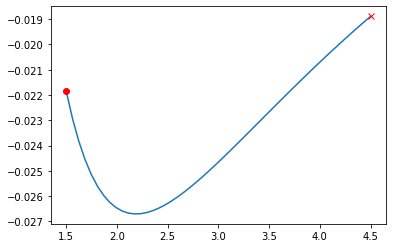

In [40]:
# Plot the function
x = np.linspace(1.5,4.5,50)
plt.plot(x,f(x))
plt.plot(1.5,f(1.5),'ro')
plt.plot(4.5,f(4.5),'rx')

In [34]:
def goldensection(a_left,b_right,precision=0.2,round_num=2):
    """
    a_left: The left boundary
    b_right: The right boundary
    precision: Defalut value is 0.2
    
    This function is to implement goldensection method and the return 
    of the function can track all the steps
    
    """
    a = [a_left]
    b = [b_right]
    x1 = []
    x2 = []
    golden = (-1+np.sqrt(5))/2
    precision = 0.2
    i = 0

    x1.append(round(b[i]-golden*(b[i]-a[i]),round_num))
    x2.append(round(a[i]+golden*(b[i]-a[i]),round_num))

    while abs(b[i]-a[i])>= precision: #Check if the interval satisfy the precision
        if f(x2[i])>f(x1[i]):
            a.append(a[i])
            b.append(x2[i])
            x2.append(x1[i])
            x1.append(round(b[i+1]-golden*(b[i+1]-a[i+1]),round_num))

        else:
            a.append(x1[i])
            b.append(b[i])
            x1.append(x2[i])
            x2.append(round(a[i+1]+golden*(b[i+1]-a[i+1]),round_num))

        i += 1
        
    return a,x1,x2,b,i

In [41]:
a,x1,x2,b,i = goldensection(1.5,4,5)


# Fibonacci Method

In [46]:
def Fib_Seq(Fn):
    """
    Fn: the value that we need to exceed
    
    fib_seq: The fibonacci sequence that we might use in the future 
    N: The number of total N and N-1 is the number of total evaluations
    """
    fib_seq = [1,1]
    N = 1
    while fib_seq[-1]<Fn:
        fib_seq.append(fib_seq[-1]+fib_seq[-2])
        N += 1
    return fib_seq,N

#fib_seq,n = fib_seq(21)

In [58]:
def fibonaccimethod(a_left,b_right,precision=0.2,round_num=2):
    """
    a_left: The left boundary of the interval
    b_right: The right boundary of the interval
    precision: Defalut value is 0.2
    
    This function is to implement goldensection method and the return 
    of the function can track all the steps
    
    j: The number of iterations
    
    """
    # Initiate 
    a = [a_left]
    b = [b_right]
    x1 = []
    x2 = []
    i = 0
    j = 1
    
    #Determine the number of iterations
    Fn = np.ceil((2*(b[0]-a[0]))/precision)
    fib_seq,N = Fib_Seq(Fn)
    
    x1.append(round(a[0]+(b[0]-a[0])*(fib_seq[N-2]/fib_seq[N]),round_num))
    x2.append(round(a[0]+(b[0]-a[0])*(fib_seq[N-1]/fib_seq[N]),round_num))

    while abs(b[i]-a[i])>= precision: #Check if the interval satisfy the precision
        
        if f(x2[i])>f(x1[i]):
            a.append(a[i])
            b.append(x2[i])
            x2.append(x1[i])
            x1.append(round(a[i+1]+(b[i+1]-a[i+1])*(fib_seq[N-j-1]/fib_seq[N-j+1]),round_num))

        else:
            a.append(x1[i])
            b.append(b[i])
            x1.append(x2[i])
            x2.append(round(a[i+1]+(b[i+1]-a[i+1])*(fib_seq[N-j]/fib_seq[N-j+1]),round_num))
         
        i += 1
        j += 1
        
    return a,x1,x2,b,i,fib_seq,N,j

In [64]:
a,x1,x2,b,i,fib_seq,N,j = fibonaccimethod(1.5,4.5,2/7,5)
print(len(a))
for i in range(6):
    print(a[i],x1[i],x2[i],b[i])

6
1.5 2.64286 3.35714 4.5
1.5 2.20748 2.64286 3.35714
1.5 1.93956 2.20748 2.64286
1.93956 2.20748 2.37912 2.64286
1.93956 2.11538 2.20748 2.37912
2.11538 2.20748 2.29121 2.37912


In [65]:
def f(x):
    return np.exp(-x)-np.cos(x)
a,x1,x2,b,i,fib_seq,N,j = fibonaccimethod(0,1,0.5,5)
for i in range(j):
    print(a[i],x1[i],x2[i],b[i])

0 0.4 0.6 1
0.4 0.6 0.76 1
0.4 0.52 0.6 0.76
